In [1]:
%run imports.py

Succesfully imported libraries and modules



## Introduction

In this workspace we will generate:
1) Comparison of PAC OFF and ON + visualization
2) Comparison of cross-PAC and inter-PAC + visualization
3) Comparison of stongest PAC OFF vs ON

Statistical tests should be made to test for difference for each comparison.
1. Test for normality (stats.normaltest)
2. Test for difference (t-test or wilcoxon test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)


In [2]:
filename = "beta_hfo_pac_powers_REST.csv"

df = pd.read_csv(filename, sep=',', index_col=0)
df.head()

,patient,condition,phase,amplitude,beta_power,hfo_power,pac_power_p2,pac_power_p09,is_cross_pac,ldopa
0,Patient1,1Day ON Rest 180sec,R1-2A,R1-2A,0.471097,0.001178,0.0,0.0,0,ON
1,Patient1,1Day ON Rest 180sec,R1-2A,R4-3B,0.471097,0.001514,0.0,0.0,1,ON
2,Patient1,1Day ON Rest 180sec,R1-2A,R1-2B,0.471097,0.000648,0.0,0.0,1,ON
3,Patient1,1Day ON Rest 180sec,R1-2A,R4-3C,0.471097,0.001486,0.0,0.0,1,ON
4,Patient1,1Day ON Rest 180sec,R1-2A,R2B-3B,0.471097,0.000949,0.0,0.0,1,ON


In [118]:
df.tail()

,patient,condition,phase,amplitude,beta_power,hfo_power,pac_power_p2,pac_power_p09,is_cross_pac,ldopa
3823,Patient6,1Day OFF Rest 180sec,L2A-3A,L4-3A,1.0043,0.000270,0.000000,0.000000,1,OFF
3824,Patient6,1Day OFF Rest 180sec,L2A-3A,L4-3B,1.0043,0.000061,0.000000,0.000000,1,OFF
3825,Patient6,1Day OFF Rest 180sec,L2A-3A,L1-2B,1.0043,0.000240,0.000000,0.000000,1,OFF
3826,Patient6,1Day OFF Rest 180sec,L2A-3A,L1-2C,1.0043,0.000145,0.000000,0.000000,1,OFF
3827,Patient6,1Day OFF Rest 180sec,L2A-3A,L2A-3A,1.0043,0.000317,0.000193,0.000683,0,OFF


<AxesSubplot:xlabel='ldopa', ylabel='pac_power_p09'>

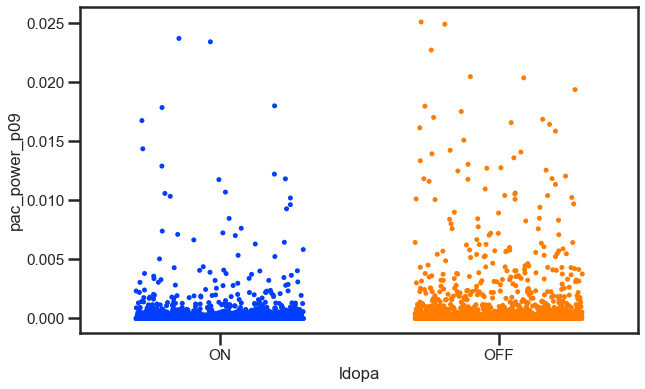

In [119]:
sns.set_context('poster', font_scale=0.7)
sns.stripplot(x='ldopa', y='pac_power_p09', data=df, jitter=0.3, palette='bright')

## Saving violinplots

In [13]:
with open('path_data.txt', 'r') as f:
    data_path = f.readline()

save_path = os.path.join(data_path, 'im_common', 'PAC statistical comparison', 'Violinplots')

try:
    os.makedirs(save_path)
except:
    pass

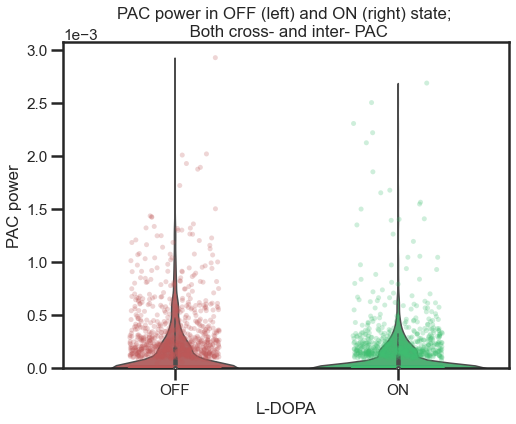

In [6]:
plt.figure(figsize=(8, 6))
sns.set_context('poster', font_scale=0.7)
my_palette = {"OFF": "#bf5858", "ON": "#3fbf70"}
sns.stripplot(x='ldopa', y='pac_power_p2', data=df, jitter=0.2, palette=my_palette, alpha=0.25, order=['OFF', 'ON'])
ax = sns.violinplot(x='ldopa', y='pac_power_p2', data=df, palette=my_palette, order=['OFF', 'ON'], linewidth=1.5, cut=0)
ax.set_xlabel("L-DOPA")
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.set_ylabel("PAC power")
ax.set_ylim(bottom=0)
ax.set_title("PAC power in OFF (left) and ON (right) state; \n Both cross- and inter- PAC")
plt.savefig(os.path.join(save_path, 'Violin_OFF vs ON.png'), dpi=150)

In [15]:
df['Cross_PAC'] = df['is_cross_pac'].apply(lambda x: "Cross-PAC" if x == 1 else "Inter-PAC")

In [16]:
df

,patient,condition,phase,amplitude,beta_power,hfo_power,pac_power_p2,pac_power_p09,is_cross_pac,ldopa,Cross_PAC
0,Patient1,1Day ON Rest 180sec,R1-2A,R1-2A,0.471097,0.001178,0.000000,0.000000,0,ON,Inter-PAC
1,Patient1,1Day ON Rest 180sec,R1-2A,R4-3B,0.471097,0.001514,0.000000,0.000000,1,ON,Cross-PAC
2,Patient1,1Day ON Rest 180sec,R1-2A,R1-2B,0.471097,0.000648,0.000000,0.000000,1,ON,Cross-PAC
3,Patient1,1Day ON Rest 180sec,R1-2A,R4-3C,0.471097,0.001486,0.000000,0.000000,1,ON,Cross-PAC
4,Patient1,1Day ON Rest 180sec,R1-2A,R2B-3B,0.471097,0.000949,0.000000,0.000000,1,ON,Cross-PAC
...,...,...,...,...,...,...,...,...,...,...,...
3823,Patient6,1Day OFF Rest 180sec,L2A-3A,L4-3A,1.004300,0.000270,0.000000,0.000000,1,OFF,Cross-PAC
3824,Patient6,1Day OFF Rest 180sec,L2A-3A,L4-3B,1.004300,0.000061,0.000000,0.000000,1,OFF,Cross-PAC
3825,Patient6,1Day OFF Rest 180sec,L2A-3A,L1-2B,1.004300,0.000240,0.000000,0.000000,1,OFF,Cross-PAC
3826,Patient6,1Day OFF Rest 180sec,L2A-3A,L1-2C,1.004300,0.000145,0.000000,0.000000,1,OFF,Cross-PAC


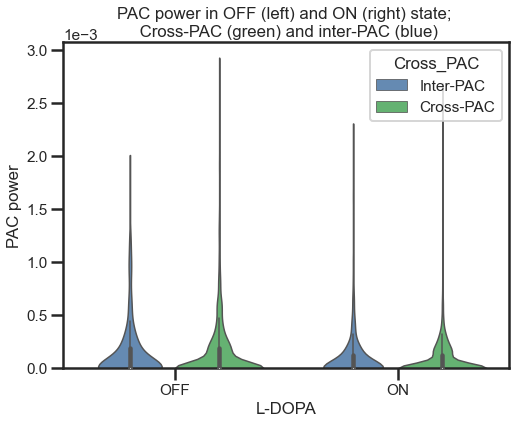

In [17]:
plt.figure(figsize=(8, 6))
sns.set_context('poster', font_scale=0.7)
my_palette = {"OFF": "#bf5858", "ON": "#3fbf70"}
my_hue_palette = {"Inter-PAC": '#588abf', "Cross-PAC": "#58bf69"}

palette = my_hue_palette

#sns.stripplot(x='ldopa', y='pac_power_p2', data=df, hue='is_cross_pac', palette=palette, alpha=0.25, order=['OFF', 'ON'])
ax = sns.violinplot(x='ldopa', y='pac_power_p2', hue='Cross_PAC', data=df, 
                    palette=palette, 
                    order=['OFF', 'ON'], linewidth=1.5, cut=0)

#plt.legend(labels=["Inter-PAC","Cross-PAC"])
ax.set_xlabel("L-DOPA")
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.set_ylim(bottom=0)
ax.set_ylabel("PAC power")
ax.set_title("PAC power in OFF (left) and ON (right) state; \n Cross-PAC (green) and inter-PAC (blue)")
plt.savefig(os.path.join(save_path, 'Violin_Cross vs Inter OFF vs ON.png'), dpi=150)

## KDE PAC power OFF vs ON

### All PAC

In [18]:
with open('path_data.txt', 'r') as f:
    data_path = f.readline()

save_path = os.path.join(data_path, 'im_common', 'PAC statistical comparison', 'KDEs and wilcoxon tests')

try:
    os.makedirs(save_path)
except:
    pass

In [19]:
df_offvson = pd.read_csv("df_OFFvsON_new.csv", sep=',', index_col=0)

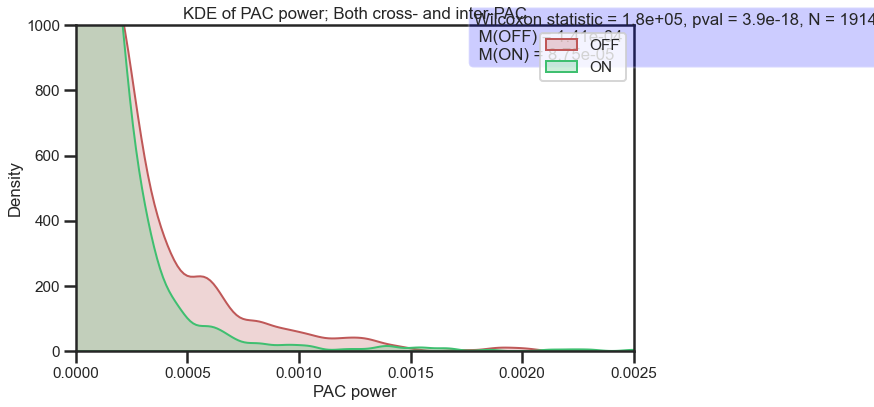

In [22]:
my_palette = {"OFF": "#bf5858", "ON": "#3fbf70"}

x = df_offvson.pac_power_OFF
y = df_offvson.pac_power_ON

stat, pvalue = stats.wilcoxon(x, y, alternative='two-sided')

for ldopa in ["OFF", "ON"]:
    y = df[df['ldopa'] == ldopa].pac_power_p2
    sns.kdeplot(y, cut=0, shade=True, color=my_palette[ldopa], label=ldopa)
    
median_off = x.mean()
median_on = y.mean()

stat_result = f"Wilcoxon statistic = {stat:.1e}, pval = {pvalue:.1e}, N = {len(x)} \n M(OFF) = {median_off:.2e} \n M(ON) = {median_on:.2e}"
plt.text(0.9, 0.9, s=stat_result, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.2, ), transform=ax.transAxes)
plt.legend()
plt.xlabel("PAC power")
title = "KDE of PAC power; Both cross- and inter-PAC"
plt.title(title)
plt.xlim((0, 2.5e-3))
plt.ylim((0, 1000))

plt.savefig(os.path.join(save_path, title + ".png"), dpi=150, bbox_inches='tight')

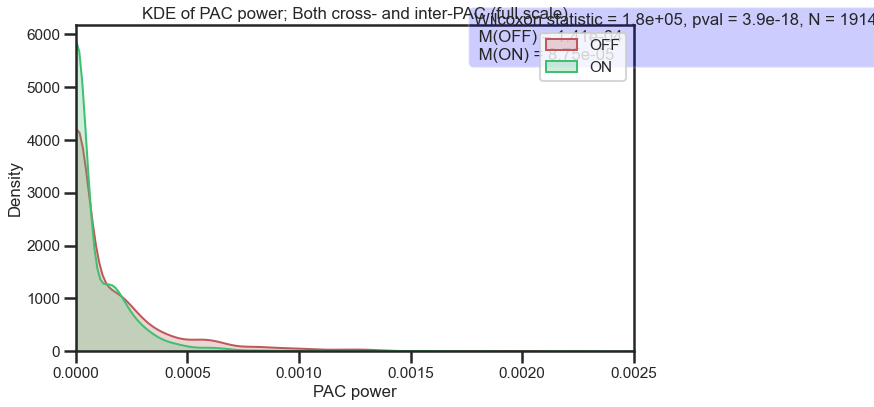

In [23]:
my_palette = {"OFF": "#bf5858", "ON": "#3fbf70"}

x = df_offvson.pac_power_OFF
y = df_offvson.pac_power_ON

stat, pvalue = stats.wilcoxon(x, y, alternative='two-sided')

for ldopa in ["OFF", "ON"]:
    y = df[df['ldopa'] == ldopa].pac_power_p2
    sns.kdeplot(y, cut=0, shade=True, color=my_palette[ldopa], label=ldopa)

median_off = x.mean()
median_on = y.mean()

stat_result = f"Wilcoxon statistic = {stat:.1e}, pval = {pvalue:.1e}, N = {len(x)} \n M(OFF) = {median_off:.2e} \n M(ON) = {median_on:.2e}"
plt.text(0.9, 0.9, s=stat_result, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.2, ), transform=ax.transAxes)
plt.legend()
plt.xlabel("PAC power")
title = "KDE of PAC power; Both cross- and inter-PAC (full scale)"
plt.title(title)
plt.xlim((0, 2.5e-3))

plt.savefig(os.path.join(save_path, title + ".png"), dpi=150, bbox_inches='tight')

### Cross-PAC

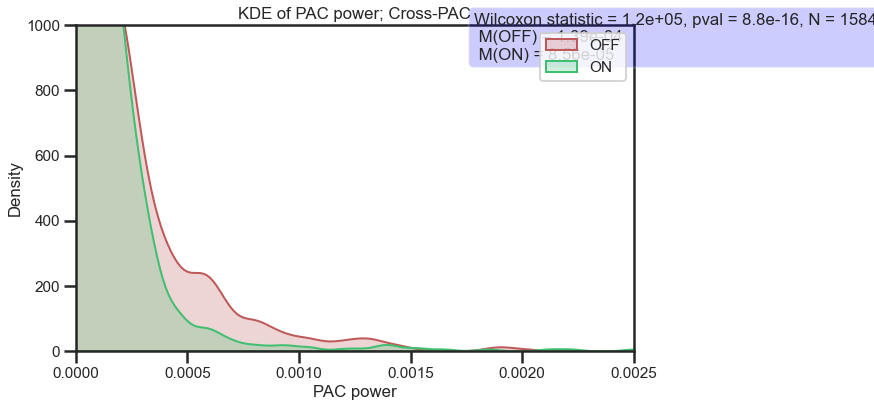

In [24]:
my_palette = {"OFF": "#bf5858", "ON": "#3fbf70"}

mask = df_offvson.is_cross_pac == 1
x = df_offvson.pac_power_OFF[mask]
y = df_offvson.pac_power_ON[mask]

stat, pvalue = stats.wilcoxon(x, y, alternative='two-sided')

for ldopa in ["OFF", "ON"]:
    y = df_offvson[f'pac_power_{ldopa}'][mask]
    sns.kdeplot(y, cut=0, shade=True, color=my_palette[ldopa], label=ldopa)

median_off = x.mean()
median_on = y.mean()

stat_result = f"Wilcoxon statistic = {stat:.1e}, pval = {pvalue:.1e}, N = {len(x)} \n M(OFF) = {median_off:.2e} \n M(ON) = {median_on:.2e}"
plt.text(0.9, 0.9, s=stat_result, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.2, ), transform=ax.transAxes)
plt.legend()
plt.xlabel("PAC power")
title = "KDE of PAC power; Cross-PAC"
plt.title(title)
plt.xlim((0, 2.5e-3))
plt.ylim((0, 1000))

plt.savefig(os.path.join(save_path, title + ".png"), dpi=150, bbox_inches='tight')

### Inter-PAC

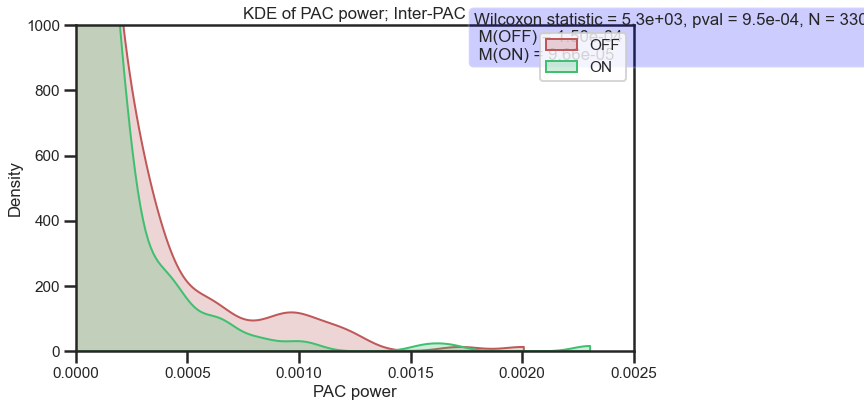

In [26]:
my_palette = {"OFF": "#bf5858", "ON": "#3fbf70"}

mask = df_offvson.is_cross_pac == 0
x = df_offvson.pac_power_OFF[mask]
y = df_offvson.pac_power_ON[mask]

stat, pvalue = stats.wilcoxon(x, y, alternative='two-sided')

for ldopa in ["OFF", "ON"]:
    y = df_offvson[f'pac_power_{ldopa}'][mask]
    sns.kdeplot(y, cut=0, shade=True, color=my_palette[ldopa], label=ldopa)

median_off = x.mean()
median_on = y.mean()

stat_result = f"Wilcoxon statistic = {stat:.1e}, pval = {pvalue:.1e}, N = {len(x)} \n M(OFF) = {median_off:.2e} \n M(ON) = {median_on:.2e}"
plt.text(0.9, 0.9, s=stat_result, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.2, ), transform=ax.transAxes)
plt.legend()
plt.xlabel("PAC power")
title = "KDE of PAC power; Inter-PAC"
plt.title(title)
plt.xlim((0, 2.5e-3))
plt.ylim((0, 1000))

plt.savefig(os.path.join(save_path, title + ".png"), dpi=150, bbox_inches='tight')
plt.show()

## Wilcoxon Tests

Нужно составить табличку именно paired samples (1 condition OFF vs 1 condition ON)

Хоче сделать так:
1Day Rest pac_power_ON = ..., pac_power_OFF = ...

In [100]:
df = pd.read_csv("df_OFFvsON_Rest.csv", sep=',', index_col=0)
df.head()

,patient,phase,amplitude,is_cross_pac,day,beta_power_OFF,beta_power_ON,hfo_power_OFF,hfo_power_ON,pac_power_p2_OFF,pac_power_p2_ON,pac_power_p09_OFF,pac_power_p09_ON
0,Patient1,L3A-3C,L3A-3C,0,1Day,0.410675,0.589151,0.000208,0.000399,0.000115,0.0,0.000215,0.0
1,Patient1,R4-3C,R4-3C,0,1Day,0.685725,0.613916,0.000096,0.001504,0.000000,0.0,0.000000,0.0
2,Patient1,R4-3C,R1-2B,1,1Day,0.685725,0.613916,0.000099,0.000351,0.000160,0.0,0.000308,0.0
3,Patient1,R4-3C,R4-3A,1,1Day,0.685725,0.613916,0.000073,0.000843,0.000193,0.0,0.000364,0.0
4,Patient1,R4-3C,R2B-3B,1,1Day,0.685725,0.613916,0.000076,0.001215,0.000000,0.0,0.000000,0.0


In [16]:
df['pac_power_p2_diff'] = df['pac_power_p2_OFF'] - df['pac_power_p2_ON']
df['pac_power_p09_diff'] = df['pac_power_p09_OFF'] - df['pac_power_p09_ON']

### OFF - ON difference KDE

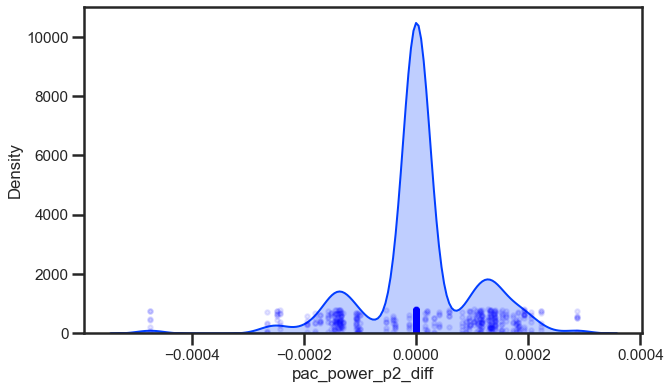

In [45]:
y = df['pac_power_p2_diff']

sns.kdeplot(data=df, x=y, vertical=False, shade=True)
plt.scatter(x=y, y=np.zeros(len(y)) + 800 * np.random.uniform(size=len(y)),  alpha=0.1, s=20, c='blue')

## Cross- vs Inter-PAC: nonparametric test

In [11]:
x_cross = df[df.is_cross_pac == 1]['pac_power_p2']
x_inter = df[df.is_cross_pac == 0]['pac_power_p2']

res, pval = stats.mannwhitneyu(x_cross, x_inter, alternative='greater')
print(f"Mann-Whitney-U test result: statistic = {res:.2e}, pvalue = {pval:.2f}")

Mann-Whitney-U test result: statistic = 1.04e+06, pvalue = 0.57


### OFF vs ON - all PACs

In [99]:
x = df_offvson.pac_power_p2_OFF
y = df_offvson.pac_power_p2_ON

stats.wilcoxon(x, y, alternative='two-sided')

WilcoxonResult(statistic=37833.0, pvalue=0.1030874980763672)

### OFF vs ON - cross PAC and inter-PAC

#### Inter-PAC

In [103]:
x = df.pac_power_p2_OFF[df.is_cross_pac == 0]
y = df.pac_power_p2_ON[df.is_cross_pac == 0]

stats.wilcoxon(x, y, alternative='two-sided')

WilcoxonResult(statistic=1896.0, pvalue=0.5419194767588376)

#### Cross-PAC

In [102]:
x = df.pac_power_p2_OFF[df.is_cross_pac == 1]
y = df.pac_power_p2_ON[df.is_cross_pac == 1]

stats.wilcoxon(x, y, alternative='two-sided')

WilcoxonResult(statistic=21522.0, pvalue=0.019313971650646813)

## Cross-PAC vs Inter-PAC

In [104]:
x_cross_off = df.pac_power_p2_OFF[df.is_cross_pac == 1]
x_cross_on = df.pac_power_p2_ON[df.is_cross_pac == 1]

x_cross = np.array(pd.concat((x_cross_off, x_cross_on), ignore_index=True))

x_inter_off = df.pac_power_p2_OFF[df.is_cross_pac == 0]
x_inter_on = df.pac_power_p2_ON[df.is_cross_pac == 0]

x_inter = np.array(pd.concat((x_cross_off, x_cross_on), ignore_index=True))



ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

In [142]:
len(pd.concat((x_inter_off, x_inter_on)))

660

In [2]:
# patient 3 - test
#
p1 = load_patient(1)
p2 = load_patient(2)
p3 = load_patient(3)
p4 = load_patient(4)
p5 = load_patient(5)
p6 = load_patient(6)

Patient directory:  D:\LAB\AlexPAC\data\Patient1
Patient directory:  D:\LAB\AlexPAC\data\Patient2
Patient directory:  D:\LAB\AlexPAC\data\Patient3
Patient directory:  D:\LAB\AlexPAC\data\Patient4
Patient directory:  D:\LAB\AlexPAC\data\Patient5
Patient directory:  D:\LAB\AlexPAC\data\Patient6


In [105]:
df_patient = df[df.patient == 'Patient1']
df_patient.head()


,patient,condition,phase,amplitude,beta_power,hfo_power,pac_power_p2,pac_power_p09,is_cross_pac,ldopa
0,Patient1,1Day OFF Rest 180sec,R4-3B,R4-3B,0.930514,0.000298,0.000164,0.000319,0,OFF
1,Patient1,1Day OFF Rest 180sec,R4-3B,R2B-3B,0.930514,0.000222,0.000229,0.000849,1,OFF
2,Patient1,1Day OFF Rest 180sec,R4-3B,R4-3C,0.930514,0.000346,0.000000,0.000000,1,OFF
3,Patient1,1Day OFF Rest 180sec,R4-3B,R2A-3A,0.930514,0.000389,0.000000,0.000000,1,OFF
4,Patient1,1Day OFF Rest 180sec,R4-3B,R1-2C,0.930514,0.000345,0.000000,0.000000,1,OFF


In [102]:
df[df['ldopa'] == 'OFF'].head()

,patient,condition,phase,amplitude,beta_power,hfo_power,pac_power_p2,pac_power_p09,is_cross_pac,ldopa
0,Patient1,1Day OFF Rest 180sec,R4-3B,R4-3B,0.930514,0.000298,0.000164,0.000319,0,OFF
1,Patient1,1Day OFF Rest 180sec,R4-3B,R2B-3B,0.930514,0.000222,0.000229,0.000849,1,OFF
2,Patient1,1Day OFF Rest 180sec,R4-3B,R4-3C,0.930514,0.000346,0.000000,0.000000,1,OFF
3,Patient1,1Day OFF Rest 180sec,R4-3B,R2A-3A,0.930514,0.000389,0.000000,0.000000,1,OFF
4,Patient1,1Day OFF Rest 180sec,R4-3B,R1-2C,0.930514,0.000345,0.000000,0.000000,1,OFF


In [103]:
df[df['ldopa'] == 'ON'].head()

,patient,condition,phase,amplitude,beta_power,hfo_power,pac_power_p2,pac_power_p09,is_cross_pac,ldopa
174,Patient1,5Day ON Rest 180sec,R4-3B,R4-3B,0.563503,0.000496,0.000000,0.000000,0,ON
175,Patient1,5Day ON Rest 180sec,R4-3B,R2B-3B,0.563503,0.000422,0.000000,0.000000,1,ON
176,Patient1,5Day ON Rest 180sec,R4-3B,R4-3C,0.563503,0.000475,0.000358,0.001811,1,ON
177,Patient1,5Day ON Rest 180sec,R4-3B,R2A-3A,0.563503,0.000638,0.000148,0.000284,1,ON
178,Patient1,5Day ON Rest 180sec,R4-3B,R1-2C,0.563503,0.000390,0.000000,0.000000,1,ON


In [48]:
x.size

2032

In [49]:
y.size

1914

In [94]:
for patient in ['Patient' + str(i) for i in range(1, 7)]:
    print(patient)
    print(df[df.patient == patient].groupby('condition').groups.keys())
    for group in df[df.patient == patient].groupby('condition').groups.keys():
        print(f"{group}: {len(group)}")

Patient1
dict_keys(['1Day OFF Rest 180sec', '1Day ON Rest 180sec', '5Day OFF Rest 180sec', '5Day ON Rest 180sec'])
1Day OFF Rest 180sec: 20
1Day ON Rest 180sec: 19
5Day OFF Rest 180sec: 20
5Day ON Rest 180sec: 19
Patient2
dict_keys(['1Day OFF Rest 180sec', '1Day ON Rest 180sec', '5Day OFF Rest 180sec', '5Day ON Rest 180sec'])
1Day OFF Rest 180sec: 20
1Day ON Rest 180sec: 19
5Day OFF Rest 180sec: 20
5Day ON Rest 180sec: 19
Patient3
dict_keys(['1Day OFF Rest 180sec', '1Day ON Rest 180sec', '5Day OFF Rest 180sec', '5Day ON Rest 180sec'])
1Day OFF Rest 180sec: 20
1Day ON Rest 180sec: 19
5Day OFF Rest 180sec: 20
5Day ON Rest 180sec: 19
Patient4
dict_keys(['1Day OFF Rest 180sec', '1Day ON Rest 180sec', '5Day OFF Rest 180sec', '5Day ON Rest 180sec'])
1Day OFF Rest 180sec: 20
1Day ON Rest 180sec: 19
5Day OFF Rest 180sec: 20
5Day ON Rest 180sec: 19
Patient5
dict_keys(['1Day OFF Rest 180sec', '1Day ON Rest 180sec', '5Day OFF Rest 180sec', '5Day ON Rest 180sec'])
1Day OFF Rest 180sec: 20
1Day ON 

In [58]:
len(df)

3946

In [79]:
pd.set_option('display.max_rows', None)
#df[df.patient == 'Patient1']

In [83]:
p1 = load_patient(1)

Patient directory:  D:\LAB\AlexPAC\data\Patient1


In [95]:
patient = p1
conditions = list(df[df.patient == patient.name].groupby('condition').groups.keys())
print(conditions)

for phase in patient.sorted_placements:
    for amplitude in patient.sorted_placements:
        n_cond = []
        for condition in conditions:
            mask = (df.patient == patient.name) & \
                   (df.phase == phase) & \
                   (df.amplitude == amplitude) & \
                   (df.condition == condition)
            n_cond.append(len(df[mask]))
        if (n_cond[1] != n_cond[0]) or (n_cond[3] != n_cond[2]):
            print(f"{phase}->{amplitude}: {n_cond}")
        

['1Day OFF Rest 180sec', '1Day ON Rest 180sec', '5Day OFF Rest 180sec', '5Day ON Rest 180sec']


AttributeError: 'Patient' object has no attribute 'cross_placements'

In [86]:


phase = 'L2A-3A'
amplitude = 'L1-2A'
condition = "1Day OFF Rest 180sec"
mask = (df.patient == patient.name) & (df.phase == phase) & (df.amplitude == amplitude) & (df.condition == condition)

df[mask]

,patient,condition,phase,amplitude,beta_power,hfo_power,pac_power_p2,pac_power_p09,is_cross_pac,ON,ldopa
642,Patient1,1Day OFF Rest 180sec,L2A-3A,L1-2A,0.731764,0.000369,0.0001,0.000194,1,0,OFF


In [61]:
p6 = load_patient(6)

Patient directory:  D:\LAB\AlexPAC\data\Patient6


In [62]:
counter_off = 0
counter_on = 0

for pp in p6.sorted_placements:
    for pa in p6.sorted_placements:
        for condition in ["1Day OFF Rest 180sec", "1Day ON Rest 180sec"]:
            if not pac_exists(p6, condition, pp, pa):
                continue
            if "OFF" in condition:
                counter_off += 1
            if "ON" in condition:
                counter_on += 1
print(counter_off)
print(counter_on)

174
174
